In [1]:
# 패키지 임포트
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 데이터 세트 준비
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
# 데이터 세트의 셰이프 확인
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [4]:
# 데이터 세트 데이터 확인
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [5]:
# 데이터 세트 라벨 확인
print(train_labels[0:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [6]:
# 데이터 세트 전처리(셔플)
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

# 데이터 세트 전처리(정규화)
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [7]:
# 데이터 세트 전처리 후 데이터 확인
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.378719,-0.483615,1.585443,-0.256833,0.568888,-0.578469,1.045986,-1.021685,-0.626249,0.187168,1.239506,0.396372,1.184061
1,-0.398779,2.465208,-1.303042,-0.256833,-1.343225,0.109913,-1.752689,2.015845,-0.511142,-0.288253,-1.672686,0.143166,-1.072493
2,0.530880,-0.483615,1.028326,-0.256833,1.157888,-0.104501,0.845313,-0.961222,1.675886,1.565287,0.784476,0.448077,0.335265
3,-0.392156,1.412057,-1.126646,-0.256833,-1.027385,0.407554,-1.430178,0.407570,-0.511142,-0.047533,-1.490674,0.298494,-1.129080
4,-0.402030,0.990797,-0.741515,-0.256833,-1.019702,-0.333021,-1.638018,1.430403,-0.971569,-0.613224,-0.717123,0.079439,-0.677769


In [8]:
# 모델 생성
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [9]:
# 컴파일
model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mae'])

In [10]:
# EarlyStopping 준비
early_stop = EarlyStopping(monitor='val_loss', patience=30)

In [11]:
# 학습
history = model.fit(train_data, train_labels, epochs=500,
    validation_split=0.2, callbacks=[early_stop])

Epoch 1/500
11/11 [==============================] - 4s 46ms/step - loss: 561.3016 - mae: 21.8954 - val_loss: 570.5995 - val_mae: 21.9905
Epoch 2/500
11/11 [==============================] - 0s 7ms/step - loss: 517.0573 - mae: 20.8588 - val_loss: 525.3451 - val_mae: 20.9458
Epoch 3/500
11/11 [==============================] - 0s 7ms/step - loss: 468.6268 - mae: 19.6727 - val_loss: 471.1677 - val_mae: 19.6118
Epoch 4/500
11/11 [==============================] - 0s 8ms/step - loss: 409.9141 - mae: 18.1461 - val_loss: 401.8244 - val_mae: 17.8161
Epoch 5/500
11/11 [==============================] - 0s 12ms/step - loss: 334.4134 - mae: 16.0967 - val_loss: 316.5348 - val_mae: 15.4289
Epoch 6/500
11/11 [==============================] - 0s 15ms/step - loss: 248.3087 - mae: 13.4916 - val_loss: 225.9547 - val_mae: 12.6133
Epoch 7/500
11/11 [==============================] - 0s 11ms/step - loss: 165.9721 - mae: 10.6305 - val_loss: 147.8212 - val_mae: 9.6181
Epoch 8/500
11/11 [===================

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


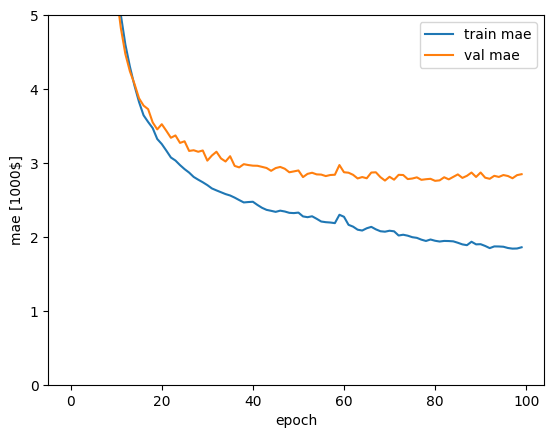

In [13]:
import matplotlib.pyplot as plt

# Print available keys
print(history.history.keys())

# 그래프 표시
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel('epoch')
plt.ylabel('mae [1000$]')
plt.legend(loc='best')
plt.ylim([0,5])
plt.show()

In [14]:
# 평가
test_loss, test_mae = model.evaluate(test_data, test_labels)
print('loss:{:.3f}\nmae: {:.3f}'.format(test_loss, test_mae))

4/4 [==============================] - 0s 4ms/step - loss: 19.6742 - mae: 2.8602
loss:19.674
mae: 2.860


In [15]:
# 추론할 가격 표시
print(np.round(test_labels[0:10]))

# 추론한 가격 표시
test_predictions = model.predict(test_data[0:10]).flatten()
print(np.round(test_predictions))

[ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
1/1 [==============================] - 0s 87ms/step
[10. 18. 22. 33. 25. 19. 26. 21. 20. 24.]
